In [2]:
from typing import TypedDict, List, Optional
from langchain_core.messages import BaseMessage

class HelpDeskState(TypedDict):
    """
    Represents the state of the help desk conversation.
    """
    chat_history: List[BaseMessage]
    current_user_query: str
    tool_invocations: List[dict] # To track which tools were called and their results
    response: Optional[str] # The final response to the user
    escalation_needed: bool # Flag to indicate if human escalation is required
    ticket_details: Optional[dict] # Details for a new ticket if escalation is needed
    retrieval_results: Optional[List[str]] # Results from RAG
    intent: Optional[str] # Detected intent of the user's query

In [ ]:
from langgraph.graph import StateGraph, END

from typing import TypedDict, List, Optional
from langchain_core.messages import BaseMessage

class HelpDeskState(TypedDict):
    """
    Represents the state of the help desk conversation.
    """
    chat_history: List[BaseMessage]
    current_user_query: str
    tool_invocations: List[dict] # To track which tools were called and their results
    response: Optional[str] # The final response to the user
    escalation_needed: bool # Flag to indicate if human escalation is required
    ticket_details: Optional[dict] # Details for a new ticket if escalation is needed
    retrieval_results: Optional[List[str]] # Results from RAG
    intent: Optional[str] # Detected intent of the user's query


    
# Define your nodes as functions (as described above)
# ... (Implement query_understanding, password_reset_tool, etc.)

workflow = StateGraph(HelpDeskState)

# Add nodes
workflow.add_node("query_understanding", query_understanding)
workflow.add_node("password_reset_tool", password_reset_tool)
workflow.add_node("software_access_tool", software_access_tool)
workflow.add_node("policy_retrieval_tool", policy_retrieval_tool)
workflow.add_node("network_troubleshooting_tool", network_troubleshooting_tool)
workflow.add_node("escalation_tool", escalation_tool)
workflow.add_node("response_generation", response_generation)


# Set entry point
workflow.set_entry_point("query_understanding") # Or a dedicated initial 'entry_point' node if you prefer

# Add edges
# From query_understanding, route to various tools
workflow.add_conditional_edges(
    "query_understanding",
    route_tool_execution, # This is your conditional routing function
    {
        "password_reset_tool": "password_reset_tool",
        "software_access_tool": "software_access_tool",
        "policy_retrieval_tool": "policy_retrieval_tool",
        "network_troubleshooting_tool": "network_troubleshooting_tool",
        "escalation_tool": "escalation_tool",
        # Default fallback for general questions or if no specific tool
        "default_response": "response_generation", 
    },
)

# After tool execution, go to response generation or escalate if unresolved
workflow.add_edge("password_reset_tool", "response_generation")
workflow.add_edge("software_access_tool", "response_generation")
workflow.add_edge("policy_retrieval_tool", "response_generation")

# Network troubleshooting might need escalation
workflow.add_conditional_edges(
    "network_troubleshooting_tool",
    should_escalate,
    {
        "escalation_tool": "escalation_tool",
        "response_generation": "response_generation"
    }
)

# After escalation setup, inform the user
workflow.add_edge("escalation_tool", "response_generation")


# After response generation, decide if conversation continues or ends
workflow.add_conditional_edges(
    "response_generation",
    should_continue_dialogue,
    {
        "query_understanding": "query_understanding", # For follow-up questions
        END: END,
    },
)

# Compile the graph
app = workflow.compile()

NameError: name 'query_understanding' is not defined

In [4]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, List, Optional
from langchain_core.messages import BaseMessage

# Define the State
class HelpDeskState(TypedDict):
    """
    Represents the state of the help desk conversation.
    """
    chat_history: List[BaseMessage]
    current_user_query: str
    tool_invocations: List[dict] # To track which tools were called and their results
    response: Optional[str] # The final response to the user
    escalation_needed: bool # Flag to indicate if human escalation is required
    ticket_details: Optional[dict] # Details for a new ticket if escalation is needed
    retrieval_results: Optional[List[str]] # Results from RAG
    intent: Optional[str] # Detected intent of the user's query

# Declare the node functions (without implementation)
def query_understanding(state: HelpDeskState) -> HelpDeskState:
    """Analyzes the user's initial query, identifies intent, and extracts entities."""
    print("Executing query_understanding node...")
    # Placeholder for actual logic
    return state

def password_reset_tool(state: HelpDeskState) -> HelpDeskState:
    """Handles password reset requests."""
    print("Executing password_reset_tool node...")
    # Placeholder for actual logic
    return state

def software_access_tool(state: HelpDeskState) -> HelpDeskState:
    """Manages software access requests."""
    print("Executing software_access_tool node...")
    # Placeholder for actual logic
    return state

def policy_retrieval_tool(state: HelpDeskState) -> HelpDeskState:
    """Retrieves company policies/documents using RAG."""
    print("Executing policy_retrieval_tool node...")
    # Placeholder for actual logic
    return state

def network_troubleshooting_tool(state: HelpDeskState) -> HelpDeskState:
    """Assists with network/hardware issues."""
    print("Executing network_troubleshooting_tool node...")
    # Placeholder for actual logic
    return state

def escalation_tool(state: HelpDeskState) -> HelpDeskState:
    """Generates details for human escalation/ticket creation."""
    print("Executing escalation_tool node...")
    # Placeholder for actual logic
    return state

def response_generation(state: HelpDeskState) -> HelpDeskState:
    """Formulates the final natural language response to the user."""
    print("Executing response_generation node...")
    # Placeholder for actual logic
    return state

# Declare the conditional edge functions (without implementation)
def route_tool_execution(state: HelpDeskState) -> str:
    """
    Decides which specific tool (or RAG) to use based on the intent.
    This function should return the name of the next node.
    """
    print("Executing route_tool_execution conditional edge...")
    # Placeholder for actual logic to determine the next node based on state.intent
    # For now, let's assume a default or simple routing
    if state.get("intent") == "reset_password":
        return "password_reset_tool"
    elif state.get("intent") == "request_software":
        return "software_access_tool"
    elif state.get("intent") == "find_policy":
        return "policy_retrieval_tool"
    elif state.get("intent") == "troubleshoot_network":
        return "network_troubleshooting_tool"
    elif state.get("escalation_needed"): # If query_understanding directly flags for escalation
         return "escalation_tool"
    return "response_generation" # Default fallback

def should_escalate(state: HelpDeskState) -> str:
    """
    Checks if human intervention is required, especially after a tool attempt.
    Returns "escalation_tool" or "response_generation".
    """
    print("Executing should_escalate conditional edge...")
    # Placeholder for actual logic, e.g., if network troubleshooting failed
    if state.get("escalation_needed"):
        return "escalation_tool"
    return "response_generation"

def should_continue_dialogue(state: HelpDeskState) -> str:
    """
    Checks if further interaction is needed or if a final response can be generated.
    Returns "query_understanding" for follow-up or END to terminate.
    """
    print("Executing should_continue_dialogue conditional edge...")
    # Placeholder for actual logic, e.g., based on response quality or user prompt for more info
    if "follow_up_needed" in state and state["follow_up_needed"]:
        return "query_understanding"
    return END

# Build the LangGraph workflow
workflow = StateGraph(HelpDeskState)

# Add nodes
workflow.add_node("query_understanding", query_understanding)
workflow.add_node("password_reset_tool", password_reset_tool)
workflow.add_node("software_access_tool", software_access_tool)
workflow.add_node("policy_retrieval_tool", policy_retrieval_tool)
workflow.add_node("network_troubleshooting_tool", network_troubleshooting_tool)
workflow.add_node("escalation_tool", escalation_tool)
workflow.add_node("response_generation", response_generation)

# Set entry point
workflow.set_entry_point("query_understanding")

# Add edges
# From query_understanding, route to various tools or default response
workflow.add_conditional_edges(
    "query_understanding",
    route_tool_execution,
    {
        "password_reset_tool": "password_reset_tool",
        "software_access_tool": "software_access_tool",
        "policy_retrieval_tool": "policy_retrieval_tool",
        "network_troubleshooting_tool": "network_troubleshooting_tool",
        "escalation_tool": "escalation_tool", # If query_understanding directly detects need for escalation
        "response_generation": "response_generation", # Default fallback for general questions
    },
)

# After successful tool execution, go to response generation
workflow.add_edge("password_reset_tool", "response_generation")
workflow.add_edge("software_access_tool", "response_generation")
workflow.add_edge("policy_retrieval_tool", "response_generation")

# Network troubleshooting might need escalation
workflow.add_conditional_edges(
    "network_troubleshooting_tool",
    should_escalate,
    {
        "escalation_tool": "escalation_tool",
        "response_generation": "response_generation"
    }
)

# After escalation setup, inform the user
workflow.add_edge("escalation_tool", "response_generation")

# After response generation, decide if conversation continues or ends
workflow.add_conditional_edges(
    "response_generation",
    should_continue_dialogue,
    {
        "query_understanding": "query_understanding", # For follow-up questions
        END: END,
    },
)

# Compile the graph
app = workflow.compile()

# To visualize the graph, you would typically use:
# from IPython.display import Image, display
# display(Image(app.get_graph().draw_png()))

In [7]:
# To visualize the graph
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_png()))
except Exception as e:
    print(f"Could not draw graph: {e}")
    print("Please ensure you have graphviz installed and its executables are in your system's PATH.")
    print("On macOS: brew install graphviz")
    print("On Debian/Ubuntu: sudo apt-get install graphviz")
    print("On Windows, download from graphviz.org and add to PATH.")

Could not draw graph: Install pygraphviz to draw graphs: `pip install pygraphviz`.
Please ensure you have graphviz installed and its executables are in your system's PATH.
On macOS: brew install graphviz
On Debian/Ubuntu: sudo apt-get install graphviz
On Windows, download from graphviz.org and add to PATH.


In [8]:
pip install grandalf

Note: you may need to restart the kernel to use updated packages.


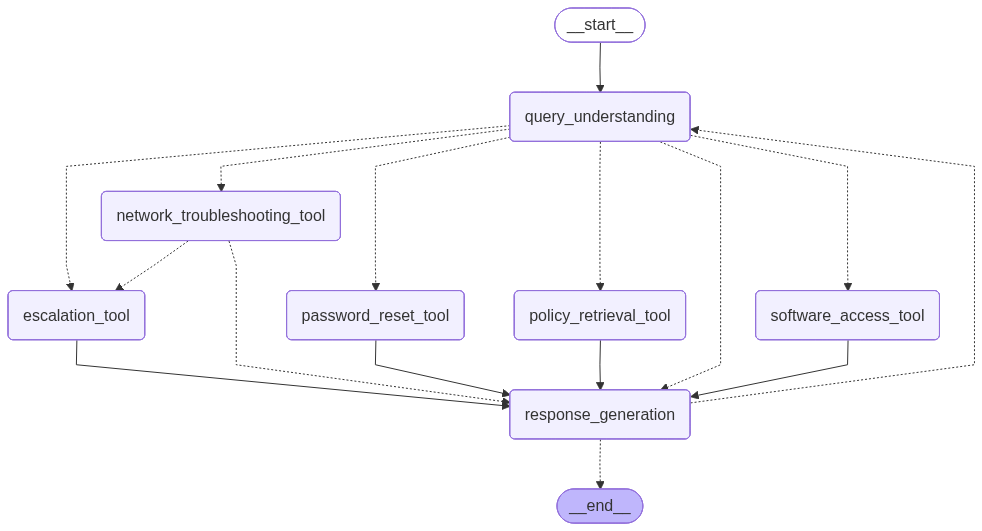

In [9]:
Image(app.get_graph().draw_mermaid_png())

In [10]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, List, Optional
from langchain_core.messages import BaseMessage

# Define the State
class HelpDeskState(TypedDict):
    """
    Represents the state of the help desk conversation.
    """
    chat_history: List[BaseMessage]
    current_user_query: str
    tool_invocations: List[dict] # To track which tools were called and their results
    response: Optional[str] # The final response to the user
    escalation_needed: bool # Flag to indicate if human escalation is required
    ticket_details: Optional[dict] # Details for a new ticket if escalation is needed
    retrieval_results: Optional[List[str]] # Results from RAG
    intent: Optional[str] # Detected intent of the user's query
    follow_up_needed: bool # To indicate if the conversation should continue

# Declare the node functions (without implementation, just declarations)
def entry_point(state: HelpDeskState) -> HelpDeskState:
    """
    Purpose: Initial receipt of the user's query.
    Action: Stores the current_user_query into the state.
    """
    print("Executing entry_point node (User Query Reception)...")
    # In a real scenario, this would likely take user input and update current_user_query
    # For now, assume current_user_query is already set or this is where it's populated.
    return {**state, "follow_up_needed": False, "escalation_needed": False} # Reset flags for new query

def query_understanding(state: HelpDeskState) -> HelpDeskState:
    """
    Purpose: Determine the user's intent and extract relevant entities.
    Action: Uses an LLM to classify intent and extract entities.
    Updates State: intent, potentially asks clarifying questions if intent is ambiguous.
    """
    print("Executing query_understanding node...")
    # Placeholder for actual LLM call to determine intent
    # For testing the graph, we'll manually set an intent based on some logic
    user_query = state.get("current_user_query", "").lower()
    intent = "general_question" # Default
    if "password" in user_query and "reset" in user_query:
        intent = "password_reset"
    elif "software" in user_query or "access" in user_query:
        intent = "software_access"
    elif "policy" in user_query or "document" in user_query:
        intent = "policy_lookup"
    elif "network" in user_query or "hardware" in user_query or "troubleshoot" in user_query:
        intent = "network_troubleshooting"
    elif "help" in user_query and "human" in user_query or "escalate" in user_query:
        intent = "escalation"
        
    return {**state, "intent": intent}

def tool_router(state: HelpDeskState) -> HelpDeskState:
    """
    Purpose: Decides which specific tool to invoke based on the intent detected.
    Action: This will be a conditional edge function (route_tool_execution).
    """
    print("Executing tool_router node (This node doesn't perform actions, it routes)...")
    # This node primarily acts as a placeholder before the conditional routing function.
    return state # The routing logic is in route_tool_execution


def password_reset_tool(state: HelpDeskState) -> HelpDeskState:
    """
    Purpose: Automate password reset process.
    Action: Simulates interaction with an internal system.
    Updates State: tool_invocations, response.
    """
    print("Executing password_reset_tool node...")
    return {**state, "response": "Your password has been reset successfully!", "tool_invocations": state.get("tool_invocations", []) + [{"tool": "password_reset_tool", "status": "success"}]}

def software_access_tool(state: HelpDeskState) -> HelpDeskState:
    """
    Purpose: Grant or check status of software access.
    Action: Simulates interaction with an internal access management system.
    Updates State: tool_invocations, response.
    """
    print("Executing software_access_tool node...")
    return {**state, "response": "Your software access request is being processed.", "tool_invocations": state.get("tool_invocations", []) + [{"tool": "software_access_tool", "status": "success"}]}

def policy_retrieval_tool(state: HelpDeskState) -> HelpDeskState:
    """
    Purpose: Retrieve relevant company policies or knowledge base articles.
    Action: Performs RAG against an internal knowledge base.
    Updates State: retrieval_results, tool_invocations.
    """
    print("Executing policy_retrieval_tool node...")
    return {**state, "response": "Here's the policy on vacation time.", "retrieval_results": ["Policy A", "Policy B"], "tool_invocations": state.get("tool_invocations", []) + [{"tool": "policy_retrieval_tool", "status": "success"}]}

def network_troubleshooting_tool(state: HelpDeskState) -> HelpDeskState:
    """
    Purpose: Guide users through basic network/hardware troubleshooting.
    Action: LLM-driven questions or links. If unresolved, it might set escalation_needed = True.
    Updates State: tool_invocations, response.
    """
    print("Executing network_troubleshooting_tool node...")
    # Simulate a scenario where troubleshooting might or might not resolve the issue
    if "complex" in state.get("current_user_query", "").lower():
        return {**state, "response": "I've tried some basic steps, but this seems complex. I might need to escalate.", "escalation_needed": True, "tool_invocations": state.get("tool_invocations", []) + [{"tool": "network_troubleshooting_tool", "status": "failed"}]}
    else:
        return {**state, "response": "I've guided you through some network troubleshooting steps. Did that help?", "escalation_needed": False, "tool_invocations": state.get("tool_invocations", []) + [{"tool": "network_troubleshooting_tool", "status": "success"}]}


def escalation_tool(state: HelpDeskState) -> HelpDeskState:
    """
    Purpose: Prepare information for human agent escalation or ticket creation.
    Action: Summarizes chat_history, extracts key details, and formats them for a new ticket.
    Updates State: escalation_needed = True, ticket_details.
    """
    print("Executing escalation_tool node...")
    return {**state, "escalation_needed": True, "ticket_details": {"issue": state.get("current_user_query"), "history": state.get("chat_history")}, "response": "I've created a ticket for you and a human agent will get back to you shortly."}


def response_generation(state: HelpDeskState) -> HelpDeskState:
    """
    Purpose: Generate a coherent, natural language response to the user.
    Action: Uses an LLM to synthesize information.
    Updates State: response.
    """
    print("Executing response_generation node...")
    final_response = state.get("response", "I'm not sure how to respond.")
    if state.get("escalation_needed"):
        final_response += " Your issue has been escalated."
    
    # Simulate follow-up needed for demonstration
    follow_up = "another question" in state.get("current_user_query", "").lower()
    
    return {**state, "response": final_response, "follow_up_needed": follow_up}

# Declare the conditional edge functions
def route_tool_execution(state: HelpDeskState) -> str:
    """
    Purpose: Dynamic routing after query_understanding.
    Logic: Routes based on the detected intent.
    """
    print(f"Executing route_tool_execution conditional edge. Intent: {state.get('intent')}")
    if state.get("intent") == "password_reset":
        return "password_reset_tool"
    elif state.get("intent") == "software_access":
        return "software_access_tool"
    elif state.get("intent") == "policy_lookup":
        return "policy_retrieval_tool"
    elif state.get("intent") == "network_troubleshooting":
        return "network_troubleshooting_tool"
    elif state.get("intent") == "escalation":
        return "escalation_tool"
    # Default for general questions or if no specific tool match
    return "response_generation"

def should_escalate(state: HelpDeskState) -> str:
    """
    Purpose: Determines if human intervention is needed, typically after a tool fails.
    Logic: Checks the 'escalation_needed' flag.
    """
    print(f"Executing should_escalate conditional edge. Escalation Needed: {state.get('escalation_needed')}")
    if state.get("escalation_needed"):
        return "escalation_tool"
    return "response_generation"

def should_continue_dialogue(state: HelpDeskState) -> str:
    """
    Purpose: Decides if the conversation is complete or if further interaction/clarification is needed.
    Logic: Based on the 'follow_up_needed' flag or explicit user intent.
    """
    print(f"Executing should_continue_dialogue conditional edge. Follow up needed: {state.get('follow_up_needed')}")
    if state.get("follow_up_needed"):
        return "entry_point" # Loop back to start for a new query
    return END # Terminate conversation

# Build the LangGraph workflow
workflow = StateGraph(HelpDeskState)

# Add nodes
workflow.add_node("entry_point", entry_point)
workflow.add_node("query_understanding", query_understanding)
workflow.add_node("tool_router", tool_router) # Explicit tool_router node
workflow.add_node("password_reset_tool", password_reset_tool)
workflow.add_node("software_access_tool", software_access_tool)
workflow.add_node("policy_retrieval_tool", policy_retrieval_tool)
workflow.add_node("network_troubleshooting_tool", network_troubleshooting_tool)
workflow.add_node("escalation_tool", escalation_tool)
workflow.add_node("response_generation", response_generation)

# Set entry point
workflow.set_entry_point("entry_point")

# Add edges
workflow.add_edge("entry_point", "query_understanding")
workflow.add_edge("query_understanding", "tool_router") # All queries go to tool_router after understanding

# From tool_router, route to various tools or default response using the conditional function
workflow.add_conditional_edges(
    "tool_router", # Source node is now tool_router
    route_tool_execution,
    {
        "password_reset_tool": "password_reset_tool",
        "software_access_tool": "software_access_tool",
        "policy_retrieval_tool": "policy_retrieval_tool",
        "network_troubleshooting_tool": "network_troubleshooting_tool",
        "escalation_tool": "escalation_tool",
        "response_generation": "response_generation", # Default fallback for general questions
    },
)

# After successful tool execution, go to response generation
workflow.add_edge("password_reset_tool", "response_generation")
workflow.add_edge("software_access_tool", "response_generation")
workflow.add_edge("policy_retrieval_tool", "response_generation")

# Network troubleshooting might need escalation
workflow.add_conditional_edges(
    "network_troubleshooting_tool",
    should_escalate,
    {
        "escalation_tool": "escalation_tool",
        "response_generation": "response_generation"
    }
)

# After escalation setup, inform the user
workflow.add_edge("escalation_tool", "response_generation")

# After response generation, decide if conversation continues or ends
workflow.add_conditional_edges(
    "response_generation",
    should_continue_dialogue,
    {
        "entry_point": "entry_point", # For follow-up questions, loop back to start
        END: END,
    },
)

# Compile the graph
app = workflow.compile()

# To run a simple test (without actual LLM calls)
# You can uncomment and run this to see the flow in action
# print("\n--- Running a test conversation ---")
# initial_state = HelpDeskState(
#     chat_history=[],
#     current_user_query="I need to reset my password.",
#     tool_invocations=[],
#     response=None,
#     escalation_needed=False,
#     ticket_details=None,
#     retrieval_results=None,
#     intent=None,
#     follow_up_needed=False
# )
#
# result = app.invoke(initial_state)
# print(f"\nFinal State after 'reset password': {result['response']}")
#
# initial_state_2 = HelpDeskState(
#     chat_history=[BaseMessage(content="I need to reset my password.")],
#     current_user_query="My network is not working, it's a complex issue.",
#     tool_invocations=[],
#     response=None,
#     escalation_needed=False,
#     ticket_details=None,
#     retrieval_results=None,
#     intent=None,
#     follow_up_needed=False
# )
# result_2 = app.invoke(initial_state_2)
# print(f"\nFinal State after 'network complex issue': {result_2['response']}")
#
# initial_state_3 = HelpDeskState(
#     chat_history=[BaseMessage(content="My network is not working, it's a complex issue.")],
#     current_user_query="Where can I find the company's vacation policy?",
#     tool_invocations=[],
#     response=None,
#     escalation_needed=False,
#     ticket_details=None,
#     retrieval_results=None,
#     intent=None,
#     follow_up_needed=False
# )
# result_3 = app.invoke(initial_state_3)
# print(f"\nFinal State after 'vacation policy': {result_3['response']}")

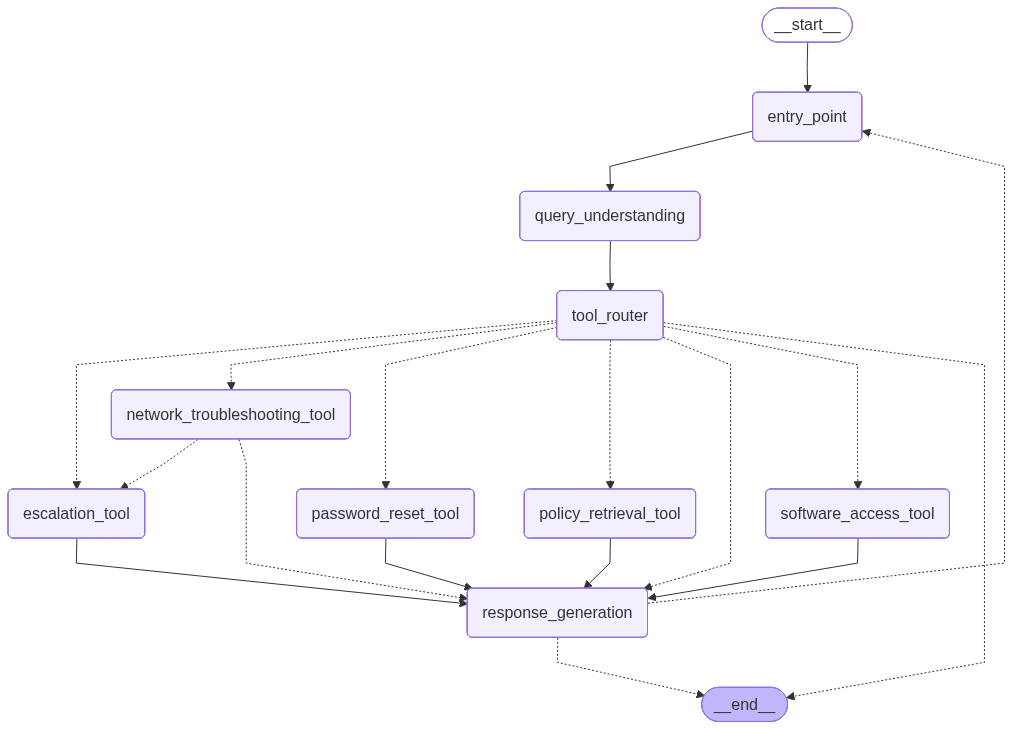

In [11]:
Image(app.get_graph().draw_mermaid_png())